In [3]:
from selenium import webdriver

In [22]:
driver = webdriver.Chrome(executable_path="/Users/shid/chromedriver")

In [23]:
seasons = list(range(2000,2022))

In [24]:
Roty_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

In [27]:
import time

season = 2021
    
url = Roty_stats_url.format(season)
   
driver.get(url)
driver.execute_script("window.scrollTo(1,10000)")
time.sleep(2)

with open("statty/{}.html".format(season), "w+",  encoding="utf-8") as f:
    f.write(driver.page_source)

In [31]:
from bs4 import BeautifulSoup
import pandas as pd

In [32]:
df = []
for season in seasons:
        with open("statty/{}.html".format(season), encoding="utf-8") as f:
            page = f.read()
    
        soup = BeautifulSoup(page, 'html.parser')
        soup.find('tr', class_="thead").decompose()
        player_table = soup.find_all(id="per_game_stats")[0]
        player_df = pd.read_html(str(player_table))[0]
        player_df["Season"] = season
        df.append(player_df)


In [33]:
players_00 = pd.concat(df)

In [34]:
players_00

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,1,Tariq Abdul-Wahad,SG,25,TOT,61,56,25.9,4.5,10.6,...,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,2000
1,1,Tariq Abdul-Wahad,SG,25,ORL,46,46,26.2,4.8,11.2,...,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2,2000
2,1,Tariq Abdul-Wahad,SG,25,DEN,15,10,24.9,3.4,8.7,...,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9,2000
3,2,Shareef Abdur-Rahim,SF,23,VAN,82,82,39.3,7.2,15.6,...,2.7,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3,2000
4,3,Cory Alexander,PG,26,DEN,29,2,11.3,1.0,3.4,...,0.3,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [38]:
players_00.to_csv("Players-00-21.csv")

In [39]:
Players_00_21 =  pd.read_csv("Players-00-21.csv")

In [40]:
Players_00_21

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,0,1,Tariq Abdul-Wahad,SG,25,TOT,61,56,25.9,4.5,...,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,2000
1,1,1,Tariq Abdul-Wahad,SG,25,ORL,46,46,26.2,4.8,...,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2,2000
2,2,1,Tariq Abdul-Wahad,SG,25,DEN,15,10,24.9,3.4,...,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9,2000
3,3,2,Shareef Abdur-Rahim,SF,23,VAN,82,82,39.3,7.2,...,2.7,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3,2000
4,4,3,Cory Alexander,PG,26,DEN,29,2,11.3,1.0,...,0.3,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13412,725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
13413,726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
13414,727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
13415,728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [36]:
ROTY = pd.read_csv("ROTY.csv")

In [37]:
ROTY

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Season
0,0,1T,Elton Brand,20,CHI,58,58,121,0.479,81,...,10.0,1.9,0.8,1.6,0.482,0.000,0.685,7.5,0.121,2000
1,1,1T,Steve Francis,22,HOU,58,58,121,0.479,77,...,5.3,6.6,1.5,0.4,0.445,0.345,0.786,6.4,0.111,2000
2,2,3,Lamar Odom,20,LAC,3,3,121,0.025,76,...,7.8,4.2,1.2,1.3,0.438,0.360,0.719,3.2,0.055,2000
3,3,4,Andre Miller,23,CLE,2,2,121,0.017,82,...,3.4,5.8,1.0,0.2,0.449,0.204,0.774,5.3,0.122,2000
4,4,1,Mike Miller,20,ORL,75,75,124,0.605,82,...,4.0,1.7,0.6,0.2,0.436,0.407,0.711,5.3,0.106,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,166,8,RJ Barrett,19,NYK,0,1,500,0.002,56,...,5.0,2.6,1.0,0.3,0.402,0.320,0.614,-0.5,-0.015,2020
167,167,1,LaMelo Ball,19,CHO,84,465,495,0.939,51,...,5.9,6.1,1.6,0.4,0.436,0.352,0.758,2.8,0.093,2021
168,168,2,Anthony Edwards,19,MIN,15,309,495,0.624,72,...,4.7,2.9,1.1,0.5,0.417,0.329,0.776,0.8,0.017,2021
169,169,3,Tyrese Haliburton,20,SAC,0,114,495,0.230,58,...,3.0,5.3,1.3,0.5,0.472,0.409,0.857,3.5,0.096,2021


In [41]:
ROTY = ROTY[["Player", "Season", "Pts Won", "Pts Max", "Share" ]]

In [42]:
ROTY.head()

,Player,Season,Pts Won,Pts Max,Share
0,Elton Brand,2000,58,121,0.479
1,Steve Francis,2000,58,121,0.479
2,Lamar Odom,2000,3,121,0.025
3,Andre Miller,2000,2,121,0.017
4,Mike Miller,2001,75,124,0.605


In [43]:
Players_00_21 =  pd.read_csv("Players-00-21.csv")

In [44]:
Players_00_21

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,0,1,Tariq Abdul-Wahad,SG,25,TOT,61,56,25.9,4.5,...,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,2000
1,1,1,Tariq Abdul-Wahad,SG,25,ORL,46,46,26.2,4.8,...,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2,2000
2,2,1,Tariq Abdul-Wahad,SG,25,DEN,15,10,24.9,3.4,...,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9,2000
3,3,2,Shareef Abdur-Rahim,SF,23,VAN,82,82,39.3,7.2,...,2.7,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3,2000
4,4,3,Cory Alexander,PG,26,DEN,29,2,11.3,1.0,...,0.3,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13412,725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
13413,726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
13414,727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
13415,728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [45]:
del Players_00_21["Unnamed: 0"]
del Players_00_21["Rk"]



In [46]:
Players_00_21["Player"] = Players_00_21["Player"].str.replace("*","", regex=False)


In [47]:
Players_00_21.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,Tariq Abdul-Wahad,SG,25,TOT,61,56,25.9,4.5,10.6,.424,...,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,2000
1,Tariq Abdul-Wahad,SG,25,ORL,46,46,26.2,4.8,11.2,.433,...,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2,2000
2,Tariq Abdul-Wahad,SG,25,DEN,15,10,24.9,3.4,8.7,.389,...,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9,2000
3,Shareef Abdur-Rahim,SF,23,VAN,82,82,39.3,7.2,15.6,.465,...,2.7,7.4,10.1,3.3,1.1,1.1,3.0,3.0,20.3,2000
4,Cory Alexander,PG,26,DEN,29,2,11.3,1.0,3.4,.286,...,0.3,1.2,1.4,2.0,0.8,0.1,1.0,1.3,2.8,2000


In [48]:
Players_00_21[Players_00_21["Player"] == "Tariq Abdul-Wahad"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,Tariq Abdul-Wahad,SG,25,TOT,61,56,25.9,4.5,10.6,.424,...,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,2000
1,Tariq Abdul-Wahad,SG,25,ORL,46,46,26.2,4.8,11.2,.433,...,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2,2000
2,Tariq Abdul-Wahad,SG,25,DEN,15,10,24.9,3.4,8.7,.389,...,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9,2000
517,Tariq Abdul-Wahad,SG,26,DEN,29,12,14.5,1.5,3.8,.387,...,0.5,1.6,2.0,0.8,0.5,0.4,1.2,1.9,3.8,2001
1074,Tariq Abdul-Wahad,SG,27,TOT,24,12,18.4,2.3,6.1,.374,...,1.7,1.8,3.5,1.0,0.8,0.4,1.1,2.3,5.6,2002
1075,Tariq Abdul-Wahad,SG,27,DEN,20,12,20.9,2.8,7.3,.379,...,2.0,2.0,3.9,1.1,0.9,0.5,1.2,2.6,6.8,2002
1076,Tariq Abdul-Wahad,SG,27,DAL,4,0,6.0,0.0,0.5,.000,...,0.5,1.0,1.5,0.5,0.5,0.3,0.8,1.3,0.0,2002
1594,Tariq Abdul-Wahad,SG,28,DAL,14,0,14.6,1.9,4.1,.466,...,1.0,1.9,2.9,1.5,0.4,0.2,0.5,1.9,4.1,2003


In [50]:
def single_team(df):
    if df.shape[0]==1:
        return df
    else:
        row = df[df["Tm"]=="TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row

Players_00_21 = Players_00_21.groupby(["Player", "Season"]).apply(single_team)

In [51]:
Players_00_21

Player Pos Age   Tm   G  GS    MP   FG  \
Player         Season                                                        
A.C. Green     2000   184       A.C. Green  PF  36  LAL  82  82  23.5  2.1   
               2001   703       A.C. Green  PF  37  MIA  82   1  17.2  1.8   
A.J. Bramlett  2000   57     A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   
A.J. Guyton    2001   706      A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   
               2002   1259     A.J. Guyton  PG  23  CHI  45   6  13.5  2.0   
...                                    ...  ..  ..  ...  ..  ..   ...  ...   
Željko Rebrača 2002   1468  Željko Rebrača   C  29  DET  74   4  15.9  2.6   
               2003   1968  Željko Rebrača   C  30  DET  30  12  16.3  2.7   
               2004   2549  Željko Rebrača   C  31  ATL  24   2  11.4  1.4   
               2005   3149  Željko Rebrača   C  32  LAC  58   2  16.0  2.3   
               2006   3743  Željko Rebrača   C  33  LAC  29   2  14.2  1.8   

                            FGA   FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player         Season                  ...                                      
A.C. Green     2000   184   4.7  .447  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6   
               2001   703   4.0  .444  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5   
A.J. Bramlett  2000   57    2.6  .190  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4   
A.J. Guyton    2001   706   5.8  .406  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7   
               2002   1259  5.4  .361  ...  0.3  0.7  1.0  1.8  0.2  0.2  0.8   
...                         ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
Željko Rebrača 2002   1468  5.1  .505  ...  1.1  2.8  3.9  0.5  0.4  1.0  1.1   
               2003   1968  4.8  .552  ...  0.9  2.2  3.1  0.3  0.2  0.6  1.0   
               2004   2549  3.2  .442  ...  1.0  1.5  2.4  0.3  0.2  0.5  0.7   
               2005   3149  4.0  .568  ...  0.8  2.3  3.2  0.4  0.2  0.7  0.8   
               2006   3743  3.3  .542  ...  0.4  1.8  2.2  0.3  0.2  0.7  0.8   

                             PF  PTS Season  
Player         Season                        
A.C. Green     2000   184   1.5  5.0   2000  
               2001   703   1.5  4.5   2001  
A.J. Bramlett  2000   57    1.6  1.0   2000  
A.J. Guyton    2001   706   1.1  6.0   2001  
               2002   1259  0.5  5.4   2002  
...                         ...  ...    ...  
Željko Rebrača 2002   1468  2.6  6.9   2002  
               2003   1968  2.6  6.6   2003  
               2004   2549  2.2  3.8   2004  
               2005   3149  2.2  5.8   2005  
               2006   3743  2.0  4.7   2006  

[10375 rows x 30 columns]

In [52]:
Players_00_21.index = Players_00_21.index.droplevel()

In [53]:
Players_00_21.index = Players_00_21.index.droplevel()

In [54]:
Players_00_21.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
184,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,2.0,4.0,5.9,1.0,0.6,0.2,0.6,1.5,5.0,2000
703,A.C. Green,PF,37,MIA,82,1,17.2,1.8,4.0,.444,...,1.3,2.5,3.8,0.5,0.4,0.1,0.5,1.5,4.5,2001
57,A.J. Bramlett,C,23,CLE,8,0,7.6,0.5,2.6,.190,...,1.5,1.3,2.8,0.0,0.1,0.0,0.4,1.6,1.0,2000
706,A.J. Guyton,PG,22,CHI,33,8,19.1,2.4,5.8,.406,...,0.3,0.8,1.1,1.9,0.3,0.2,0.7,1.1,6.0,2001
1259,A.J. Guyton,PG,23,CHI,45,6,13.5,2.0,5.4,.361,...,0.3,0.7,1.0,1.8,0.2,0.2,0.8,0.5,5.4,2002


In [55]:
Players_00_21[Players_00_21["Player"] == "Tariq Abdul-Wahad"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Season
0,Tariq Abdul-Wahad,SG,25,DEN,61,56,25.9,4.5,10.6,.424,...,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4,2000
517,Tariq Abdul-Wahad,SG,26,DEN,29,12,14.5,1.5,3.8,.387,...,0.5,1.6,2.0,0.8,0.5,0.4,1.2,1.9,3.8,2001
1074,Tariq Abdul-Wahad,SG,27,DAL,24,12,18.4,2.3,6.1,.374,...,1.7,1.8,3.5,1.0,0.8,0.4,1.1,2.3,5.6,2002
1594,Tariq Abdul-Wahad,SG,28,DAL,14,0,14.6,1.9,4.1,.466,...,1.0,1.9,2.9,1.5,0.4,0.2,0.5,1.9,4.1,2003


In [62]:
combined = Players_00_21.merge(ROTY, how="outer", on=["Player", "Season"])

In [63]:
combined[combined["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Season,Pts Won,Pts Max,Share
76,Adam Morrison,PF,22,CHA,78,23,29.8,4.6,12.1,.376,...,2.1,0.4,0.1,1.7,2.3,11.8,2007,44.0,640.0,0.069
119,Al Horford,C,21,ATL,81,77,31.4,4.1,8.2,.499,...,1.5,0.7,0.9,1.7,3.3,10.1,2008,390.0,625.0,0.624
147,Al Thornton,PF,24,LAC,79,31,27.3,4.7,11.0,.429,...,1.2,0.6,0.5,1.6,2.5,12.7,2008,30.0,625.0,0.048
299,Amar'e Stoudemire,PF,20,PHO,82,71,31.3,4.8,10.1,.472,...,1.0,0.8,1.1,2.3,3.3,13.5,2003,458.0,585.0,0.783
364,Andre Drummond,C,19,DET,60,10,20.7,3.5,5.7,.608,...,0.5,1.0,1.6,1.0,2.4,7.9,2013,36.0,605.0,0.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10094,Walter Herrmann,PF,27,CHA,48,12,19.5,3.6,6.9,.527,...,0.5,0.4,0.1,0.7,1.6,9.2,2007,5.0,640.0,0.008
10217,Willy Hernangómez,C,22,NYK,72,22,18.4,3.4,6.5,.529,...,1.3,0.6,0.5,1.4,2.1,8.2,2017,8.0,500.0,0.016
10250,Yao Ming,C,22,HOU,82,72,29.0,4.9,9.8,.498,...,1.7,0.4,1.8,2.1,2.8,13.5,2003,405.0,585.0,0.692
10265,Yogi Ferrell,PG,23,DAL,46,29,26.0,3.5,8.6,.406,...,3.7,0.9,0.2,1.5,2.0,10.0,2017,1.0,500.0,0.002


In [60]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)


In [61]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Season,Pts Won,Pts Max,Share
0,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,1.0,0.6,0.2,0.6,1.5,5.0,2000,0.0,0.0,0.0
1,A.C. Green,PF,37,MIA,82,1,17.2,1.8,4.0,.444,...,0.5,0.4,0.1,0.5,1.5,4.5,2001,0.0,0.0,0.0
2,A.J. Bramlett,C,23,CLE,8,0,7.6,0.5,2.6,.190,...,0.0,0.1,0.0,0.4,1.6,1.0,2000,0.0,0.0,0.0
3,A.J. Guyton,PG,22,CHI,33,8,19.1,2.4,5.8,.406,...,1.9,0.3,0.2,0.7,1.1,6.0,2001,0.0,0.0,0.0
4,A.J. Guyton,PG,23,CHI,45,6,13.5,2.0,5.4,.361,...,1.8,0.2,0.2,0.8,0.5,5.4,2002,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10370,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
10371,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
10372,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
10373,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [64]:
teams = pd.read_csv("Rookie-Team-Stats.csv")

In [65]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Season,Team
0,0,52,30,0.634,—,94.4,91.3,2.75,2000,Miami Heat*
1,1,50,32,0.61,2,92.1,90.7,1.3,2000,New York Knicks*
2,2,49,33,0.598,3,94.8,93.4,1.02,2000,Philadelphia 76ers*
3,3,41,41,0.5,11,100.1,99.4,0.43,2000,Orlando Magic
4,4,35,47,0.427,17,99.3,100.1,-1,2000,Boston Celtics
...,...,...,...,...,...,...,...,...,...,...
750,13,42,30,0.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*
751,14,38,34,0.528,4,113.3,112.3,1.07,2021,Memphis Grizzlies*
752,15,33,39,0.458,9,111.1,112.8,-1.58,2021,San Antonio Spurs
753,16,31,41,0.431,11,114.6,114.9,-0.2,2021,New Orleans Pelicans


In [66]:
teams = teams[~teams["W"].str.contains("Division")].copy()

In [67]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)


In [68]:
sorted(teams["Team"].unique())


['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Bobcats',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans Pelicans',
 'New Orleans/Oklahoma City Hornets',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Seattle SuperSonics',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Washington Wizards']

In [69]:
sorted(combined["Tm"].unique())


['ATL',
 'BOS',
 'BRK',
 'CHA',
 'CHH',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NJN',
 'NOH',
 'NOK',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'SEA',
 'TOR',
 'UTA',
 'VAN',
 'WAS']

In [70]:
nicknames = {}
with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").split(",")
        nicknames[abbrev] = name

In [71]:
combined["Team"] = combined["Tm"].map(nicknames)


In [76]:
combined.head(60)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Season,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,0.6,0.2,0.6,1.5,5.0,2000,NaN,NaN,NaN,Los Angeles Lakers
1,A.C. Green,PF,37,MIA,82,1,17.2,1.8,4.0,.444,...,0.4,0.1,0.5,1.5,4.5,2001,NaN,NaN,NaN,Miami Heat
2,A.J. Bramlett,C,23,CLE,8,0,7.6,0.5,2.6,.190,...,0.1,0.0,0.4,1.6,1.0,2000,NaN,NaN,NaN,Cleveland Cavaliers
3,A.J. Guyton,PG,22,CHI,33,8,19.1,2.4,5.8,.406,...,0.3,0.2,0.7,1.1,6.0,2001,NaN,NaN,NaN,Chicago Bulls
4,A.J. Guyton,PG,23,CHI,45,6,13.5,2.0,5.4,.361,...,0.2,0.2,0.8,0.5,5.4,2002,NaN,NaN,NaN,Chicago Bulls
5,A.J. Guyton,PG,24,GSW,2,0,4.5,0.0,2.0,.000,...,0.5,0.0,0.5,0.0,0.0,2003,NaN,NaN,NaN,Golden State Warriors
6,A.J. Hammons,C,24,DAL,22,0,7.4,0.8,1.9,.405,...,0.0,0.6,0.5,1.0,2.2,2017,NaN,NaN,NaN,Dallas Mavericks
7,A.J. Price,PG,23,IND,56,2,15.4,2.6,6.3,.410,...,0.6,0.1,1.1,0.9,7.3,2010,NaN,NaN,NaN,Indiana Pacers
8,A.J. Price,PG,24,IND,50,0,15.9,2.3,6.4,.356,...,0.6,0.0,1.1,1.2,6.5,2011,NaN,NaN,NaN,Indiana Pacers
9,A.J. Price,PG,25,IND,44,1,12.9,1.3,4.0,.339,...,0.5,0.0,0.7,0.7,3.9,2012,NaN,NaN,NaN,Indiana Pacers


In [77]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)


In [78]:
combined.head(60)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Season,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,0.6,0.2,0.6,1.5,5.0,2000,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,37,MIA,82,1,17.2,1.8,4.0,.444,...,0.4,0.1,0.5,1.5,4.5,2001,0.0,0.0,0.0,Miami Heat
2,A.J. Bramlett,C,23,CLE,8,0,7.6,0.5,2.6,.190,...,0.1,0.0,0.4,1.6,1.0,2000,0.0,0.0,0.0,Cleveland Cavaliers
3,A.J. Guyton,PG,22,CHI,33,8,19.1,2.4,5.8,.406,...,0.3,0.2,0.7,1.1,6.0,2001,0.0,0.0,0.0,Chicago Bulls
4,A.J. Guyton,PG,23,CHI,45,6,13.5,2.0,5.4,.361,...,0.2,0.2,0.8,0.5,5.4,2002,0.0,0.0,0.0,Chicago Bulls
5,A.J. Guyton,PG,24,GSW,2,0,4.5,0.0,2.0,.000,...,0.5,0.0,0.5,0.0,0.0,2003,0.0,0.0,0.0,Golden State Warriors
6,A.J. Hammons,C,24,DAL,22,0,7.4,0.8,1.9,.405,...,0.0,0.6,0.5,1.0,2.2,2017,0.0,0.0,0.0,Dallas Mavericks
7,A.J. Price,PG,23,IND,56,2,15.4,2.6,6.3,.410,...,0.6,0.1,1.1,0.9,7.3,2010,0.0,0.0,0.0,Indiana Pacers
8,A.J. Price,PG,24,IND,50,0,15.9,2.3,6.4,.356,...,0.6,0.0,1.1,1.2,6.5,2011,0.0,0.0,0.0,Indiana Pacers
9,A.J. Price,PG,25,IND,44,1,12.9,1.3,4.0,.339,...,0.5,0.0,0.7,0.7,3.9,2012,0.0,0.0,0.0,Indiana Pacers


In [79]:
train_df = combined.merge(teams, how="outer",on=["Team", "Season"])


In [80]:
train_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,0.0,Los Angeles Lakers,9,67,15,0.817,—,100.8,92.3,8.41
1,Brian Shaw,SG,33,LAL,74,2,16.9,1.7,4.4,.382,...,0.0,Los Angeles Lakers,9,67,15,0.817,—,100.8,92.3,8.41
2,Derek Fisher,PG,25,LAL,78,22,23.1,2.1,6.2,.346,...,0.0,Los Angeles Lakers,9,67,15,0.817,—,100.8,92.3,8.41
3,Devean George,SF,22,LAL,49,1,7.0,1.1,2.9,.389,...,0.0,Los Angeles Lakers,9,67,15,0.817,—,100.8,92.3,8.41
4,Glen Rice,SF,32,LAL,80,80,31.6,5.3,12.3,.430,...,0.0,Los Angeles Lakers,9,67,15,0.817,—,100.8,92.3,8.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10370,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,.484,...,0.0,Milwaukee Bucks,7,42,40,0.512,9,103.6,103.8,-0.45
10371,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.0,Milwaukee Bucks,7,42,40,0.512,9,103.6,103.8,-0.45
10372,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,0.0,Milwaukee Bucks,7,42,40,0.512,9,103.6,103.8,-0.45
10373,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,0.0,Milwaukee Bucks,7,42,40,0.512,9,103.6,103.8,-0.45


In [81]:
del train_df["Unnamed: 0"]

In [82]:
train_df.dtypes


Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Season       int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

In [83]:
train_df = train_df.apply(pd.to_numeric, errors='ignore')


In [85]:
train_df.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Season       int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [86]:
train_df["GB"].unique()


array(['—', '6', '24', '37', '29', '21', '28', '25', '8', '19', '1', '13',
       '17', '23', '3', '15', '9', '2', '35', '20', '11', '5', '26', '18',
       '16', '41', '12', '14', '30', '34', '4', '1.5', '43', '39', '18.5',
       '48', '40', '7', '46', '10', '22', '10.5', '32', '38', '27', '33',
       '31', '50', '21.5', '45', '22.5', '25.5', '3.5', '20.5', '36',
       '11.5', '52', '56', '2.5', '12.5', '32.5', '4.5'], dtype=object)

In [87]:
train_df["GB"] = pd.to_numeric(train_df["GB"].str.replace("—","0"))


In [88]:
train_df["GB"].unique()


array([ 0. ,  6. , 24. , 37. , 29. , 21. , 28. , 25. ,  8. , 19. ,  1. ,
       13. , 17. , 23. ,  3. , 15. ,  9. ,  2. , 35. , 20. , 11. ,  5. ,
       26. , 18. , 16. , 41. , 12. , 14. , 30. , 34. ,  4. ,  1.5, 43. ,
       39. , 18.5, 48. , 40. ,  7. , 46. , 10. , 22. , 10.5, 32. , 38. ,
       27. , 33. , 31. , 50. , 21.5, 45. , 22.5, 25.5,  3.5, 20.5, 36. ,
       11.5, 52. , 56. ,  2.5, 12.5, 32.5,  4.5])

In [89]:
train_df.dtypes


Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Season       int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [90]:
train_df.to_csv("player_rookie_stats.csv")


In [91]:
highest_scoring = train_df[train_df["G"] > 70].sort_values("PTS", ascending=False).head(10)


<AxesSubplot:xlabel='Player'>

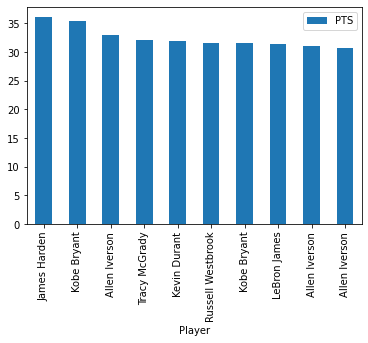

In [92]:
highest_scoring.plot.bar("Player", "PTS")
